# Código

### Carregando as principais bibliotecas

In [1]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np

### Métodos para tratamento dos dados

In [2]:
def convToInt(val):
    result = re.sub('\D+', '' , val)
    if result:
        return int(result)
    else:
        return 0

def parse_datetime(x):
    return datetime.strptime(x[1:-3], '%d/%b/%Y:%H:%M')
    
def tratarURI(val):
    result = re.sub('\?.+$', '' , val)
    return result

def convertbytetoMbyte(val):
    return (val/2048)

### Carregar o arquivo de Access log 

In [3]:
COLUMNS = ['host','datatime', 'metodo', 'uri', 'status', 'bytes']

dadosAccesslog = pd.read_csv('access_log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 5, 6, 8, 9],
                   names=COLUMNS
                             ,
                   converters={
                            'status': convToInt,
                            'bytes': convToInt,
                            'datatime':parse_datetime}
                   )
dadosAccesslog['uri'] = [tratarURI(x) for x in dadosAccesslog['uri'].values]
dadosAccesslog = dadosAccesslog.set_index('datatime')
dadosAccesslog = dadosAccesslog.sort_values(by='datatime')
dadosAccesslog['Mbytes'] = [convertbytetoMbyte(x) for x in dadosAccesslog['bytes'].values]
dadosAccesslog.head()

,host,metodo,uri,status,bytes,Mbytes
datatime,,,,,,
2018-11-29 08:18:00,10.3.19.90,"""GET",/mv/flex/AppRunner.html,302,0,0.000000
2018-11-29 08:18:00,10.1.235.70,"""GET",/mv/secure/receptor,200,0,0.000000
2018-11-29 08:18:00,10.1.235.70,"""GET",/mv/secure/receptor,200,98,0.047852
2018-11-29 08:18:00,10.3.19.90,"""GET",/mv/flex/AppRunner.html,302,0,0.000000
2018-11-29 08:18:00,10.3.19.90,"""GET",/mv/flex/AppRunner.html,200,19325,9.436035


# Análise

### Tráfego de Mbytes por hora

O objetivo do gráfico abaixo é demonstrar o tráfego de byte médio e máximo por hora, registrado no access log do Apache

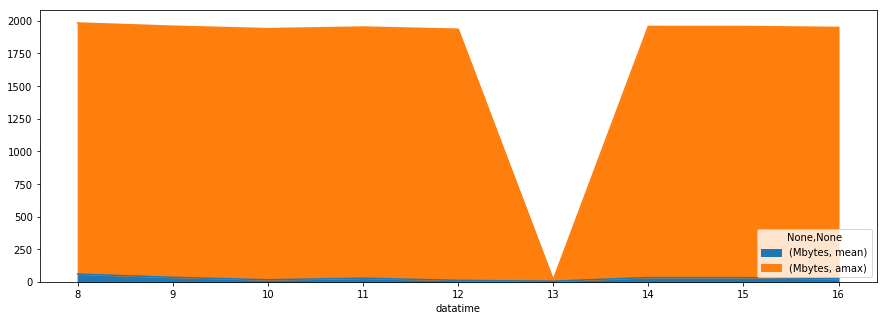

In [4]:
grb = dadosAccesslog.groupby([dadosAccesslog.index.hour]).agg({    
    'Mbytes': [np.mean, np.max]
})


grb.plot.area(figsize=(15, 5))

### URI com maiores Tráfigos Médios de bytes

O objetivo de gráfico abaixo e apresentar os maiores 'uri' que trafegam mais bytes

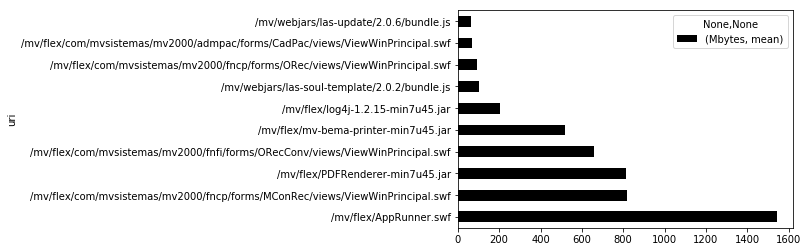

In [5]:
grbUriByte = dadosAccesslog.groupby(dadosAccesslog['uri']).agg({    
    'Mbytes': [np.mean]
})
grbUriByte = grbUriByte.sort_values(by=[('Mbytes','mean')], ascending=False)
grbUriByte.head(10).plot.barh(stacked=True, colormap='copper');

E entrem os maiores 'URI', quais são as frências de 'MBytes' que eles trafegam

In [6]:
dffreq = dadosAccesslog.loc[(dadosAccesslog['uri'].isin(grbUriByte.head(10).index)) ]

arrayFreq = []
for x in grbUriByte.head(10).index:
    print(x)
    print(dffreq.loc[dffreq['uri']==x, ['uri', 'Mbytes']].describe())


/mv/flex/AppRunner.swf
            Mbytes
count    46.000000
mean   1542.629968
std     693.392314
min       7.992188
25%    1355.897705
50%    1923.012695
75%    1923.012695
max    1923.012695
/mv/flex/com/mvsistemas/mv2000/fncp/forms/MConRec/views/ViewWinPrincipal.swf
           Mbytes
count    2.000000
mean   817.645996
std      0.000000
min    817.645996
25%    817.645996
50%    817.645996
75%    817.645996
max    817.645996
/mv/flex/PDFRenderer-min7u45.jar
           Mbytes
count    4.000000
mean   812.871094
std      0.000000
min    812.871094
25%    812.871094
50%    812.871094
75%    812.871094
max    812.871094
/mv/flex/com/mvsistemas/mv2000/fnfi/forms/ORecConv/views/ViewWinPrincipal.swf
           Mbytes
count    2.000000
mean   660.942383
std      0.000000
min    660.942383
25%    660.942383
50%    660.942383
75%    660.942383
max    660.942383
/mv/flex/mv-bema-printer-min7u45.jar
           Mbytes
count    4.000000
mean   517.366699
std      0.000000
min    517.366699
25%  

In [7]:
arrayFreq = []
for x in grbUriByte.head(10).index:
    arrayFreq.append({
        'URI' : x,
        'Descricao' : dffreq.loc[dffreq['uri']==x, ['uri', 'Mbytes']].describe()
    })

arrayFreq = pd.DataFrame(data=arrayFreq)
arrayFreq = arrayFreq.set_index('URI')
arrayFreq

,Descricao
URI,
/mv/flex/AppRunner.swf,Mbytes count 46.000000 mean 1...
/mv/flex/com/mvsistemas/mv2000/fncp/forms/MConRec/views/ViewWinPrincipal.swf,Mbytes count 2.000000 mean 817...
/mv/flex/PDFRenderer-min7u45.jar,Mbytes count 4.000000 mean 812...
/mv/flex/com/mvsistemas/mv2000/fnfi/forms/ORecConv/views/ViewWinPrincipal.swf,Mbytes count 2.000000 mean 660...
/mv/flex/mv-bema-printer-min7u45.jar,Mbytes count 4.000000 mean 517...
/mv/flex/log4j-1.2.15-min7u45.jar,Mbytes count 4.00000 mean 202.5...
/mv/webjars/las-soul-template/2.0.2/bundle.js,Mbytes count 8.000000 mean 102...
/mv/flex/com/mvsistemas/mv2000/fncp/forms/ORec/views/ViewWinPrincipal.swf,Mbytes count 2.00000 mean 91.2016...
/mv/flex/com/mvsistemas/mv2000/admpac/forms/CadPac/views/ViewWinPrincipal.swf,Mbytes count 3.00000 mean 70.6674...


In [8]:

# IPython 
import IPython
from IPython.core.display import HTML
from IPython.display import Image



#                 Run (once) to allow nice html output as report (optional) 


"""
Hide code cells in an IPython notebook or exported HTML using javascript. 
Taken from Max Masnick's answer in 
http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer.
"""

# Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html(
    '<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area, .output_stderr").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """.input_area .output_stderr {height: 2.0em; overflow: hidden}"""  # changes input_subarea width to 1 visible line
HTML('<style>{}</style>'.format(CSS))

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Click in rendered .html output only, toggles the code</button>''', raw=True)



Click in rendered .html output only, toggles the code